<a href="https://colab.research.google.com/github/RisaRules6762/protein-RMSD-project/blob/main/AI_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

     RMSD        F1       F2       F3        F4            F5        F6  \
0  17.284  13558.30  4305.35  0.31754  162.1730  1.872791e+06  215.3590   
1   6.021   6191.96  1623.16  0.26213   53.3894  8.034467e+05   87.2024   
2   9.275   7725.98  1726.28  0.22343   67.2887  1.075648e+06   81.7913   
3  15.851   8424.58  2368.25  0.28111   67.8325  1.210472e+06  109.4390   
4   7.962   7460.84  1736.94  0.23280   52.4123  1.021020e+06   94.5234   

        F7   F8       F9  
0  4287.87  102  27.0302  
1  3328.91   39  38.5468  
2  2981.04   29  38.8119  
3  3248.22   70  39.0651  
4  2814.42   41  39.9147  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45730 entries, 0 to 45729
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RMSD    45730 non-null  float64
 1   F1      45730 non-null  float64
 2   F2      45730 non-null  float64
 3   F3      45730 non-null  float64
 4   F4      45730 non-null  float64
 5   F5      45730 

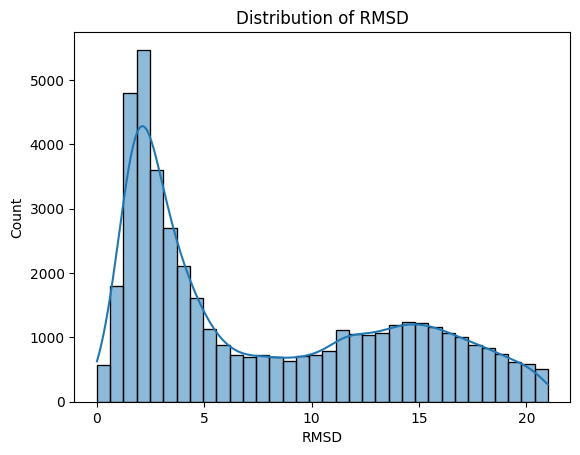

MSE: 12.546691995367112
R2 Score: 0.6666011804632745


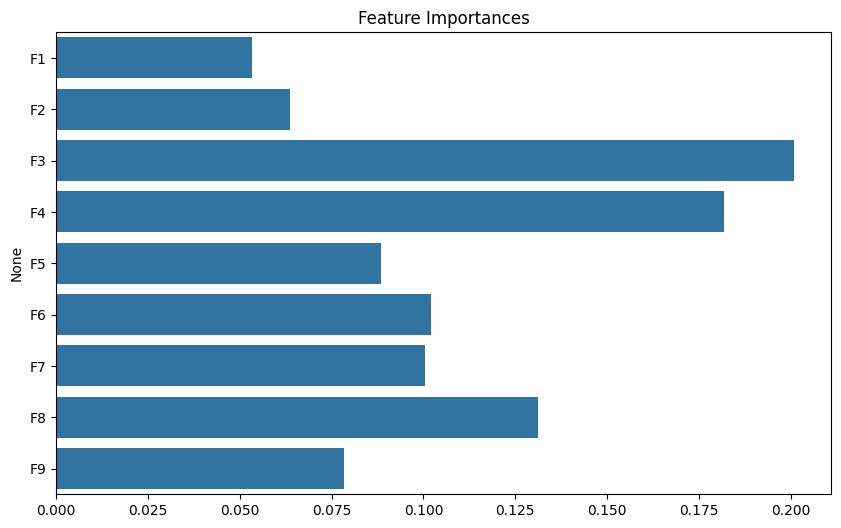

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv('proteinstructure.zip')

print(df.head())
print(df.info())
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Visualize target
sns.histplot(df['RMSD'], kde=True)
plt.title('Distribution of RMSD')
plt.show()

X = df.drop('RMSD', axis=1)
y = df['RMSD']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluation
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

# Feature importances
importances = model.feature_importances_
feature_names = df.drop('RMSD', axis=1).columns

plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importances")
plt.show()


